<a href="https://colab.research.google.com/github/subhayughoshal/Spam-SMS-Classifier-Model/blob/main/Spam_SMS_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_curve, auc, RocCurveDisplay
)

import nltk
from wordcloud import WordCloud
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Load dataset
df = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

# Display the first few rows
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data_shape = df.shape
print(f"Shape of the database data (rows, columns): {data_shape}")

Shape of the database data (rows, columns): (5572, 5)


## **Cleaning the dataset**

In [5]:
# Removing unnecessary columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Check for nulls
print(df.isnull().sum())

# Mapping labels to binary
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

df.head()


label      0
message    0
dtype: int64


/tmp/ipython-input-5-1728126657.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map({'ham': 0, 'spam': 1})


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


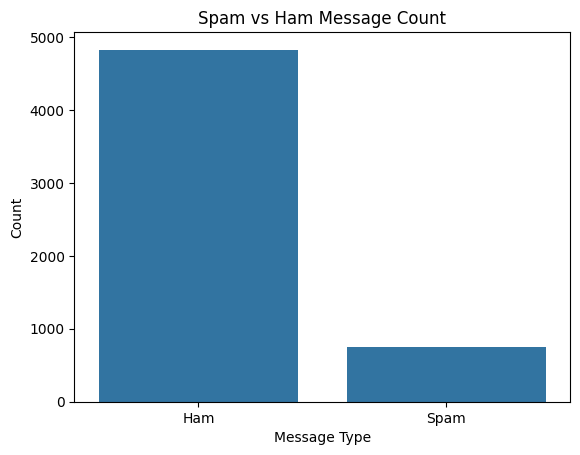

In [13]:
sns.countplot(x='label', data=df)
plt.title('Spam vs Ham Message Count')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()


In [6]:
data_shape = df.shape
print(f"Shape of the database data (rows, columns): {data_shape}")

Shape of the database data (rows, columns): (5572, 2)


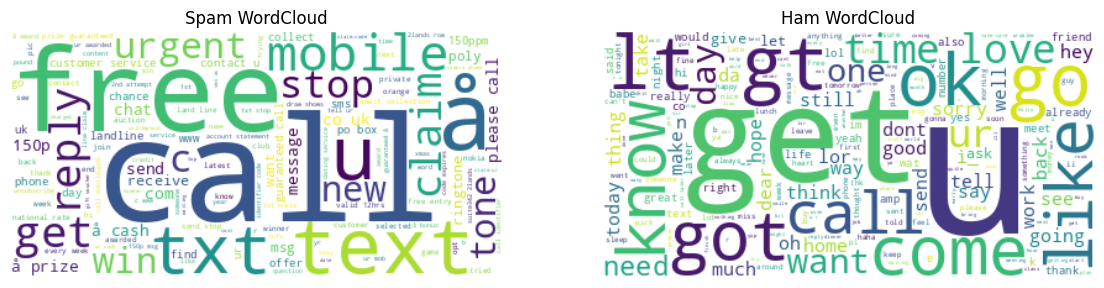

In [18]:
spam_words = ' '.join(df[df['label'] == 1]['message'].str.lower())
ham_words = ' '.join(df[df['label'] == 0]['message'].str.lower())

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
wc_spam = WordCloud(stopwords=set(stopwords.words('english')), background_color='white').generate(spam_words)
plt.imshow(wc_spam, interpolation='bilinear')
plt.title('Spam WordCloud')
plt.axis('off')

plt.subplot(1,2,2)
wc_ham = WordCloud(stopwords=set(stopwords.words('english')), background_color='white').generate(ham_words)
plt.imshow(wc_ham, interpolation='bilinear')
plt.title('Ham WordCloud')
plt.axis('off')

plt.show()


# Data Split and **TF-IDF** **Vectorization**

In [7]:
# Split data
X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


# **Logistic Regression Model**

In [8]:
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)

y_pred_lr = lr.predict(X_test_vec)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9524663677130045
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



# **Naive Bayes Model**

In [9]:
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

y_pred_nb = nb.predict(X_test_vec)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9668161434977578
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



# **SVM Model**

In [10]:
svm = SVC()
svm.fit(X_train_vec, y_train)

y_pred_svm = svm.predict(X_test_vec)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9766816143497757
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [19]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(probability=True)
}

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9525
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Naive Bayes Accuracy: 0.9668
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

SVM Accuracy: 0.9767
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.

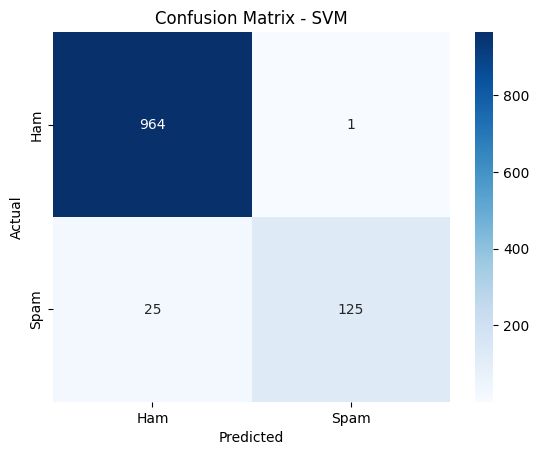

In [20]:
best_model = models['SVM']
y_pred = best_model.predict(X_test_vec)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


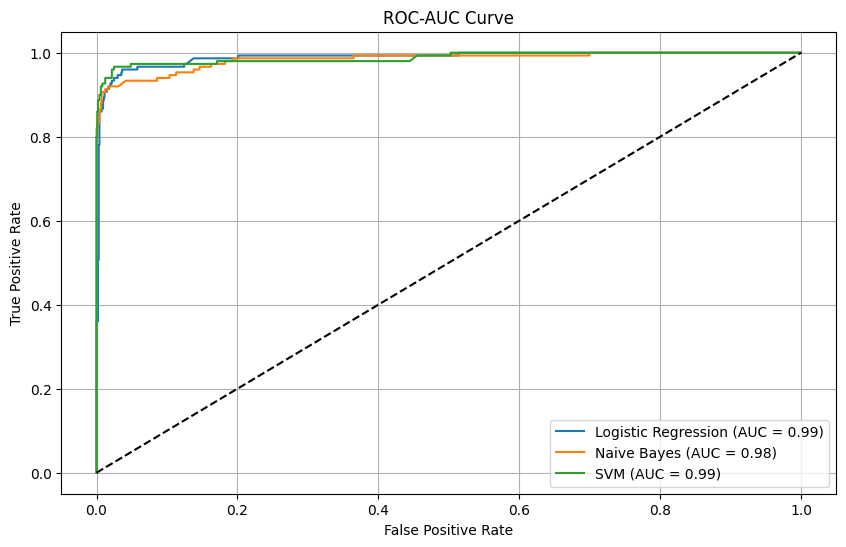

In [21]:
plt.figure(figsize=(10,6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test_vec)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.grid()
plt.show()


We can clearly see the support vector machine(SVM) model is having the highest accuracy


## Predict whether an SMS is spam or ham using the trained model.

In [22]:
def predict_sms(message, model=models['Logistic Regression']):
    msg_vec = vectorizer.transform([message])
    prediction = model.predict(msg_vec)[0]
    prob = model.predict_proba(msg_vec)[0][1]

    if prediction == 1:
        print(f"🔴 The message is likely SPAM (Confidence: {prob:.2f})")
    else:
        print(f"🟢 The message is likely HAM (legit) (Confidence: {1 - prob:.2f})")

# Example usage:
predict_sms("Congratulations! You've won a free iPhone. Claim now!")
predict_sms("Hey, are we still meeting for lunch today?")


🔴 The message is likely SPAM (Confidence: 0.83)
🟢 The message is likely HAM (legit) (Confidence: 0.98)
